In [1]:
import ROOT as rt
from larflow import larflow
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Welcome to JupyROOT 6.14/02


In [2]:
rootfile = "test_detr2d.root"
tf = rt.TFile(rootfile)
tree = tf.Get("detr")
nentries = tree.GetEntries()

(4, 6)
(236.0, 134.0) pid= 11.0
(246.0, 255.0) pid= 2212.0
(256.0, 255.0) pid= 2212.0
(271.0, 258.0) pid= 2112.0
(3, 6)
(237.0, 257.0) pid= 11.0
(246.0, 249.0) pid= 2212.0
(256.0, 256.0) pid= 2212.0
(3, 6)
(237.0, 231.0) pid= 11.0


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(246.0, 254.0) pid= 2212.0
(255.0, 255.0) pid= 2212.0


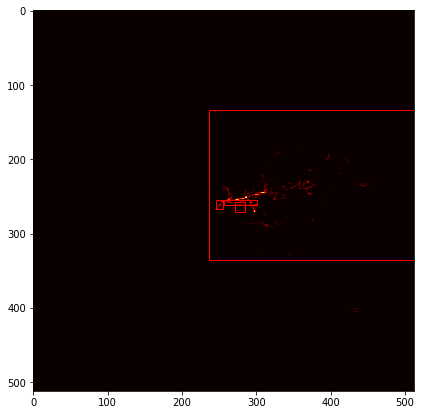

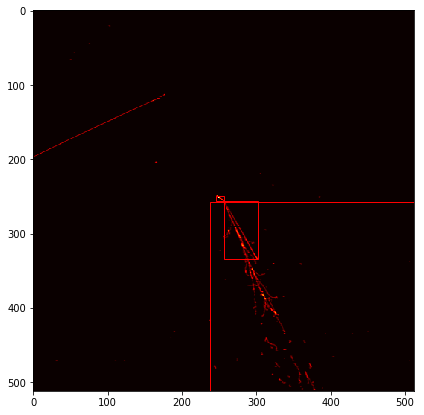

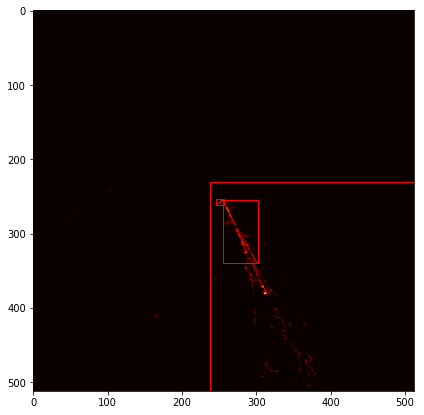

In [3]:
entry = 3
nbytes = tree.GetEntry(entry)

image_v = tree.image_v
nplanes = image_v.size()

bbox_v  = tree.bbox_v

for p in range(nplanes):
    fig, ax = plt.subplots(1,1,figsize=(7, 7))
    np_img = image_v[p].tonumpy()
    # note that data stored as (tick,wire) in order to keep wire-waveform contiguous
    
    ax.imshow(np_img, cmap='hot', interpolation='nearest')
    
    if bbox_v[p].ndims==0:
        continue
        
    np_bb  = bbox_v[p].tonumpy()
    print np_bb.shape
    
    # Create a Rectangle patch
    for i in range(np_bb.shape[0]):
        origin = (512*(np_bb[i,0]-np_bb[i,2]),512*(np_bb[i,1]-np_bb[i,3]) )
        print origin,"pid=",np_bb[i,4]
        rect = patches.Rectangle(origin, 2*np_bb[i,2]*512, 2*np_bb[i,3]*512, linewidth=1,
                                 edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
    fig.show()
